# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('real_estate_data.csv', sep='\t')


**Выводим первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


**Выведим основную информацию о датафрейме с помощью метода info().**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data['outlier'] = False # ввожу столбец-маркер для выбросов
data['outlier_2'] = False # ввожу столбец-маркер для выбросов (второй вариант)

**Строим общую гистограмму для всех числовых столбцов таблицы.**

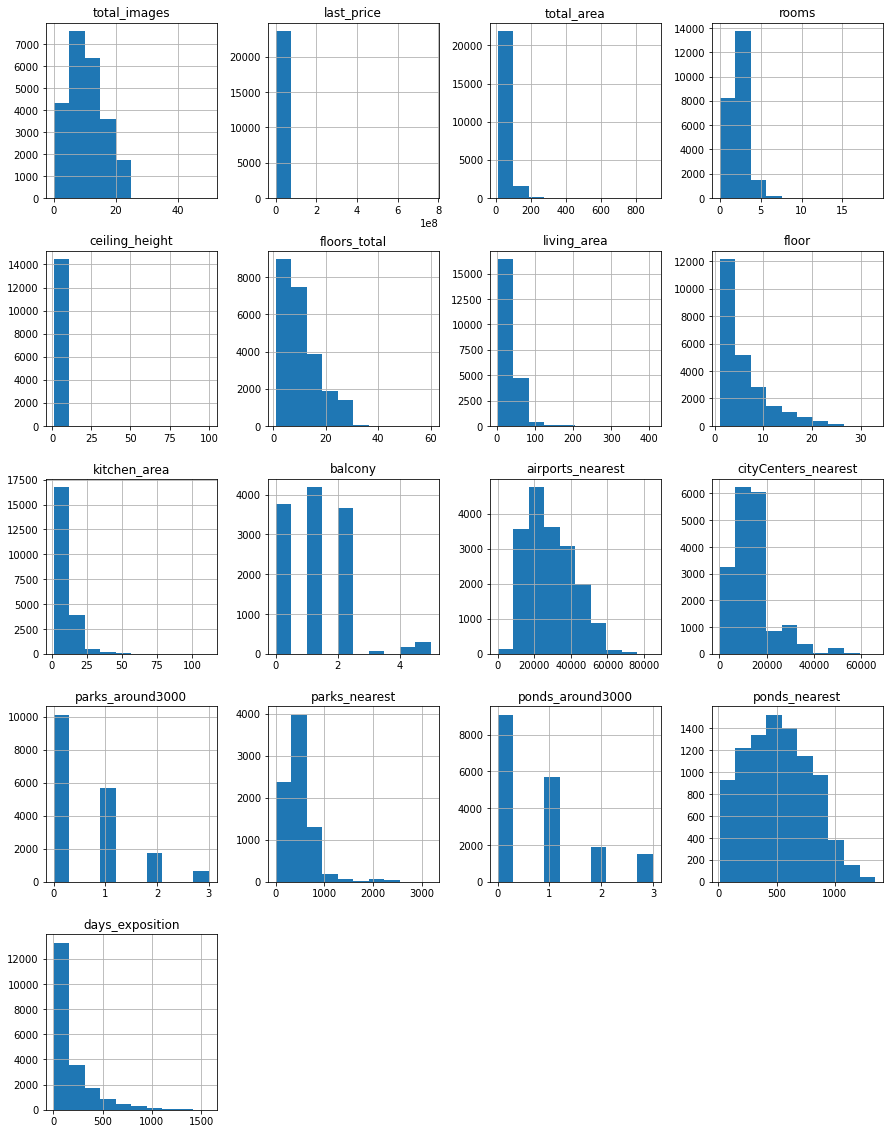

In [5]:
data.hist(figsize=(15, 20));

## Предобработка данных

### Находим и изучаем пропущенные значения в столбцах:
Определим, в каких столбцах есть пропуски.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
outlier                     0
outlier_2                   0
dtype: int64

**Заполнение пропущенных значений**
- Отсутствие данных о балконе наверняка говорит о его отсутствии - заменим пропуски нулями.
- Так же предположу, что если объект недвижимости не является апартаментами, то многие просто об этом не укажут. Допустим, что пропуски в столбце 'is_apartment' обозначают, что это не апартаменты, ставим нули.
- В квартирах-студиях кухни нет как таковой - проставим нули в площади кухни в квартирах-студиях

проведя вторую итерацию, и, выделив группу объектов с потолком выше 5м напрашивается вывод, что до 6 метров цифры похожи на правду - обычно это последние этажи, вероятно пент-хаусы. Все, что выше - выглядит странно в купе с низкой ценой. Можно удалить.
Заполним пропуски в высоте потолков медианными значениями по этажности здания. Осталось 78 строк без данных. Заполним их медианным значением, характерным для этажа объекта. Осталась одна запись.

**О причинах пропусков**
- Высота потолков - просто не указали, многие наверняка даже не знают, что в разных домах высота потолков может отличаться от привичных многим панелькам.

- Всего этажей - просто не указали, забыли.

- Жилая площадь - Параметр, конечно, интересный, но на цену квартиры не сильно влияющий. Кто-то посчитал этот параметр не важным или просто забыл про него.

- Площадь кухни - Параметр важный для восприятия квартриры как удобной, но опять же не влияющий на цену напрямую. Скорее всего забыли указать или не посчитали эту информацию важной.

- Название населенного пункта - могу предположить, что пропустили непосредственно Санкт-Петербург. Но четкого алгоритма проставления пропусков здесь предложить нельзя, оставим как есть.

- Геоданные - часть отсутствующих данных в объеме 5518 штук вероятно имеют общую (системуню) причину отсутствия. Возможно адрес был указан некорректно и системе не удалось идентифицировать локацию объекта. 

- Ближайшие парки и пруды - что-то помешало высчитать геосервису соответствующие расстояния.Данные параметры должны влиять на стоимость жилья.

- Время жизни объявления - Параметр автоматического происхождения. Вероятно, объявление еще живое и для анализа проданных квартир этот параметр не нужен. Заменять пропуск каким-либо значением нельзя, т.к. присвоив значение, мы скажем, что квартира продана по оуказанной цене.

In [7]:
# Заполняем пропуски в апартаментах
data['is_apartment'] = data['is_apartment'].fillna(False)
# Запоняем пропуски в балконах
data['balcony'] = data['balcony'].fillna(0)
# Заполняем пропуски в площади кухни
# data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0
# По результатам анализа параметра Площадь кухни я принял решение, что заменять нулями не корректно. Такие квартиры просто не будут учитываться.
# Заполнение пропусков в площади кухни описано ниже.


In [8]:
# Заполняем пропуски в высоте потолков учитывая медиану потолков в домах соответствующей высотности
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()

# Оставшиеся значения заполним медианным значением по каждому этажу
for t in data['floor'].unique():
    data.loc[(data['floor'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floor'] == t), 'ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Заполним пропуски в жилой площади.

Для этого введем коэффициент общей площади к жилой и используем его для заполнения пропусков.

In [9]:
area_koef = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull()== False]['living_area'].mean() 
 
data['living_area'] = data['living_area'].fillna(data['total_area']/area_koef)

In [10]:
# Заполняем пропуски в площади кухне медианным значением при совпадении пары параметров высотность дома и количество комнат.
# В рамках одного дома размеры кухни варьируются в зависимости от "комнатности" квартир
counter = 0
for f in data['floors_total'].unique():
    for r in data['rooms'].unique():
        data.loc[(data['floors_total'] == f) & (data['rooms'] == r) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['floors_total'] == f) & (data['rooms'] == r) , 'kitchen_area'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Пропуски в days_exposition вероятно говорят о том, что объявление еще живое. Поэтому заполнять пропуски будет не корректно - эти данные изменят картину зависимости факта продажи от длительности объявления.

In [11]:
# Проверим, сколько пропусков осталось.
print (data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              246
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
outlier                     0
outlier_2                   0
dtype: int64


### Рассмотрим типы данных в каждом столбце:
Цена, количество этажей, балконов, прудов, парков, расстояние в метрах до объектов, количество дней - все целочисленные значения. Но столбцы с пропусками пока трогать не будем, т.к. NaN - объект Float64

Дату переведем в формат даты

Апартаметны - булево значение - либо да, либо нет. При заполнении пропусков на False в столбце остались только два значения.

 
 **1   last_price            23699 non-null  float64-> int**
 
 **3   first_day_exposition  23699 non-null  object -> date**
 
 6   floors_total          23613 non-null  float64-> int
  
 9   is_apartment          2775 non-null   object -> bool
 
 **13  balcony               12180 non-null  float64-> int**
 
 15  airports_nearest      18157 non-null  float64-> int
 
 16  cityCenters_nearest   18180 non-null  float64-> int
 
 17  parks_around3000      18181 non-null  float64-> int
 
 18  parks_nearest         8079 non-null   float64-> int
 
 19  ponds_around3000      18181 non-null  float64-> int
 
 20  ponds_nearest         9110 non-null   float64-> int
 
 21  days_exposition       20518 non-null  float64-> int
 

In [12]:
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y.%m.%dT%H:%M:%S')

### Уникальные значения
#### Названия населенных пунктов. 
Заменим все виды поселков на просто посёлки.

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
data['locality_name'].nunique()

364

In [15]:
data['locality_name'] = data['locality_name'].replace(
    ['посёлок городского типа ', 'поселок городского типа ', 'посёлок при железнодорожной станции ', 'городской поселок ',  
           'поселок станции ','городской посёлок ', 'городской посeлок ', 'коттеджный поселок ', 'коттеджный посёлок ',
           'поселок ', 'посёлок '], 'поселок ', regex=True)

In [16]:
data['locality_name'].nunique()

319

 Количество уникальных значений населенных пунктов уменьшилось с 364 до 319

### Уникальные значения
#### Высота потолков. 
Список значений устремляется к 100. Понятно, что это неверные значения.
Сделаю допущение, что в больших значениях ошиблись с точкой. Выведем значения больше 20м, то есть ,больше реальных 2м.
Таких значений не так много.
Значение 22.6 вероятно должно быть 2.6м. Значение 100м (10м) даже с учетом поправки на порядок выглядит странным, возможно, его стоит отбросить.
Остальные значения делим на 10.

In [17]:
data.query('ceiling_height > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,outlier,outlier_2
355,17,3600000,55.20,2018-07-12,2,25.00,5.00,32.00,2,False,False,False,7.00,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00,False,False
3148,14,2900000,75.00,2018-11-12,3,32.00,3.00,53.00,2,False,False,False,8.00,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4643,0,4300000,45.00,2018-02-01,2,25.00,9.00,30.00,2,False,False,False,7.00,1,Санкт-Петербург,12016.00,13256.00,1.00,658.00,1.00,331.00,181.00,False,False
4876,7,3000000,25.00,2017-09-27,0,27.00,25.00,17.00,17,False,False,True,NaN,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00,False,False
5076,0,3850000,30.50,2018-10-03,1,24.00,5.00,19.50,1,True,False,False,5.50,0,Санкт-Петербург,29686.00,8389.00,3.00,397.00,1.00,578.00,7.00,False,False
5246,0,2500000,54.00,2017-10-13,2,27.00,5.00,30.00,3,False,False,False,9.00,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00,False,False
5669,4,4400000,50.00,2017-08-08,2,26.00,9.00,21.30,3,False,False,False,7.00,2,Санкт-Петербург,28981.00,10912.00,1.00,305.00,0.00,NaN,267.00,False,False
5807,17,8150000,80.00,2019-01-09,2,27.00,36.00,41.00,13,False,False,False,12.00,5,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,38.00,False,False
6246,6,3300000,44.40,2019-03-25,2,25.00,5.00,31.30,5,False,False,False,5.70,0,Кронштадт,68923.00,50649.00,1.00,417.00,2.00,73.00,NaN,False,False
9379,5,3950000,42.00,2017-03-26,3,25.00,5.00,30.00,2,False,False,False,5.20,0,Санкт-Петербург,11647.00,13581.00,0.00,NaN,0.00,NaN,NaN,False,False


In [18]:
data.loc[data['ceiling_height'] == 22.6, 'ceiling_height'] = 2.6
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data['ceiling_height']/10
data.query('ceiling_height > 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,outlier,outlier_2
397,15,5990000,54.00,2018-03-22,2,14.85,36.00,21.40,28,False,False,False,18.70,1,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,11.00,False,False
464,15,66571000,280.30,2015-06-11,6,5.20,8.00,159.50,7,False,False,False,21.10,0,Санкт-Петербург,26316.00,6655.00,3.00,187.00,1.00,616.00,578.00,False,False
1026,20,155000000,310.00,2018-10-12,5,5.30,3.00,190.00,3,False,False,False,63.00,2,Санкт-Петербург,24899.00,4785.00,0.00,NaN,1.00,603.00,NaN,False,False
1388,20,59800000,399.00,2015-01-21,5,5.60,6.00,228.80,6,False,False,False,15.00,0,Санкт-Петербург,26204.00,6934.00,2.00,149.00,2.00,577.00,719.00,False,False
3474,3,1400000,30.00,2018-03-16,1,8.00,5.00,15.30,2,False,False,False,7.30,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.00,False,False
5863,20,5650000,45.00,2018-08-15,1,8.30,16.00,19.30,14,False,False,False,8.30,1,Санкт-Петербург,13069.00,10763.00,0.00,NaN,1.00,613.00,14.00,False,False
7578,17,38000000,143.00,2017-11-02,3,5.50,5.00,83.00,5,False,False,False,29.00,1,Санкт-Петербург,26333.00,6448.00,3.00,479.00,0.00,NaN,NaN,False,False
12628,14,3900000,50.00,2018-03-29,1,5.30,5.00,28.67,5,False,False,False,6.40,0,Санкт-Петербург,19644.00,3918.00,1.00,505.00,1.00,92.00,8.00,False,False
15061,19,5600000,56.40,2018-05-11,2,14.00,14.00,32.40,5,False,False,False,9.10,2,Санкт-Петербург,14814.00,13610.00,0.00,NaN,0.00,NaN,315.00,False,False
15743,14,5600000,67.00,2016-11-11,3,8.00,16.00,41.00,1,False,False,False,8.00,0,Санкт-Петербург,32691.00,11035.00,1.00,723.00,0.00,NaN,474.00,False,False


Проведя вторую итерацию, и, выделив группу объектов с потолком выше 5м напрашивается вывод, что до 6 метров цифры похожи на правду - обычно это последние этажи, вероятно пент-хаусы. Все, что выше - выглядит странно вместе с низкой ценой. Можно удалить.

В столбце высоты потолков есть еще значения меньше 2.4 - ниже этого значения высоты поотлков в жилых домах не встречались. Предположу, что, эти значения ошибочны и заменю их на значения, характерные для домов соответствующей высотности.

In [19]:
data = data[data['ceiling_height'] <= 6]
for t in data['floors_total'].unique():
    data.loc[(data['floors_total'] == t) & (data['ceiling_height'] < 2.4), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == t), 'ceiling_height'].median()
display(data.query('ceiling_height < 2.4'))
# Осталось одно необработанное значение с высотой 1.75м - можно предопложить, что это опечатка и заменить 2.75м, что нормально для высотного дома.
data.loc[data['ceiling_height'] == 1.75, 'ceiling_height'] = 2.75

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,outlier,outlier_2
16934,5,4100000,40.00,2017-10-17,1,1.75,37.00,17.40,5,False,False,False,8.34,0,Санкт-Петербург,18732.00,20444.00,0.00,NaN,3.00,80.00,71.00,False,False


## Посчитайте и добавьте в таблицу новые столбцы

In [20]:
# Цена квадратного метра
data['sq_price']= (data['last_price'] / data ['total_area'])
data['sq_price']=round(data['sq_price'],0)
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['publish_day'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления;
data['publish_month'] = data['first_day_exposition'].dt.month
#год публикации объявления;
data['publish_year'] = data['first_day_exposition'].dt.year

# тип этажа квартиры (значения — «первый», «последний», «другой»);
def flat_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['flat_type'] = data.apply(flat_type, axis = 1)


# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).round()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23689 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23689 non-null  int64         
 1   last_price            23689 non-null  int64         
 2   total_area            23689 non-null  float64       
 3   first_day_exposition  23689 non-null  datetime64[ns]
 4   rooms                 23689 non-null  int64         
 5   ceiling_height        23689 non-null  float64       
 6   floors_total          23603 non-null  float64       
 7   living_area           23689 non-null  float64       
 8   floor                 23689 non-null  int64         
 9   is_apartment          23689 non-null  bool          
 10  studio                23689 non-null  bool          
 11  open_plan             23689 non-null  bool          
 12  kitchen_area          23443 non-null  float64       
 13  balcony         

In [22]:
data['sq_price'] = data['sq_price'].astype(int) # Переведем цену квадратного метра в целые.

## Проведите исследовательский анализ данных
### Проверка параметров объектов

In [23]:
# Введем новую переменную для датафрейма с очищенными данными по визуальной оценке гистограммы
data_clear = data.copy()
# Введем переменную для датафрейма без выбросов на основе данных describe
data_extraclear = data.copy()

#### Исследуем общую площадь.
Гистограмма после значения 250 сливается с нулем. Ограничим рассмотрение условием Общая площадь не более 250 кв.м

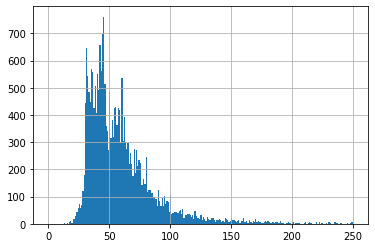

In [24]:
data.loc[data['total_area'] > 250, 'outlier'] = True #маркирую строки для удаления
data['total_area'].hist(range=(0, 250),bins=250);

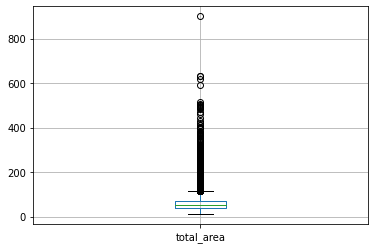

count   23689.00
mean       60.35
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

In [25]:
data.boxplot('total_area')
plt.show()
data['total_area'].describe()

In [26]:
# По столбцу jutlier2 исследую данные без выбросов по всем параметрам
data.loc[data['total_area'] > 114, 'outlier_2'] = True

#### Исследуем жилую площадь.
Гистограмма после значения 150 сливается с нулем. Ограничим рассмотрение условием Жилая площадь не более 150 кв.м (data.query('living_area < 150')

Гистограмма жилой площади имеет аномалию - 2 больших пика и один сравниельно небольшой. Предполагаю, что это связано с количеством комнат - первый пик - однокомнатные квартиры, второй пик - двухкомнатные, третий - трехкомнатные (не такой явный, т.к. трешек в целом меньше).

In [27]:
# Проверим медианные значения жилой площади для каждого количества комнат.
data.pivot_table(columns = 'rooms', values = 'living_area', aggfunc='median')
# Прежположение выше подтвердилось! Аномалии как таковыми не являются и имеют объяснимую природу.

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
living_area,18.00,17.80,30.50,44.90,63.30,91.10,123.27,147.20,161.00,169.90,161.40,133.90,409.70,195.15,409.00,180.00,264.50


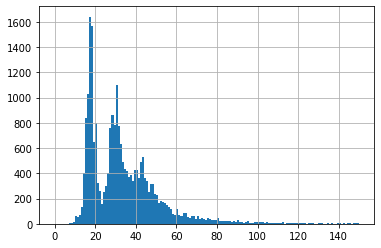

In [28]:
data.loc[data['living_area'] > 150, 'outlier'] = True
data['living_area'].hist(range=(0, 150),bins=150);

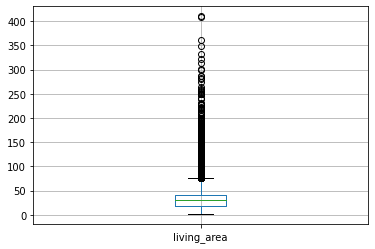

count   23689.00
mean       34.61
std        22.37
min         2.00
25%        19.00
50%        30.00
75%        42.10
max       409.70
Name: living_area, dtype: float64

In [29]:
data.boxplot('living_area')
plt.show()
data['living_area'].describe()

In [30]:
data.loc[data['living_area'] > 77, 'outlier_2'] = True

Гистограммы общей и жилой площади схожи - везде видны 3 пика, связанных с 1-, 2- и 3-х комнатными квартирами. Гистограмма жилой площади в данном случае чистая, в общей площади замешана нежилая площадь, коотрая размывает пики, но они остаются заметными.

Сравнив гистограммы на одном графике, заметно, что  частота появления определенных значений в жилой площади почти в два раза выше соответствующих пиков на облщей площади. Связываю это с зависимостью жилой площади от количества комнат (дискретный характер). Так же это подтверждает и яма между двумя пиками

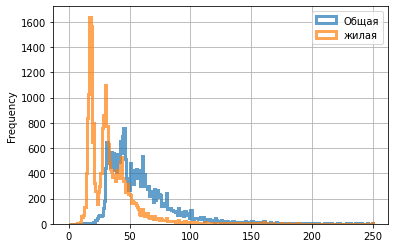

In [31]:
ax = data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 250),
    bins=250,
    linewidth=3,
    alpha=0.7,
    label='Общая',
)
data.plot(
    kind='hist',
    y='living_area',
    histtype='step',
    range=(0, 250),
    bins=250,
    linewidth=3,
    alpha=0.7,
    label='жилая',
    ax=ax,
    grid=True,
    legend=True,
); 

#### Исследуем площадь кухни.
Гистограмма после значения 50 сливается с нулем. Ограничим рассмотрение условием площадь кухни не более 50 кв.м (data.query('kitchen_area' < 50')
Анализируя гистограмму, я прихожу к выводу, что пропуски в значениях надо было оставить пропусками,т.к. если кухни нет, то не надо говорить, что она есть, но нулевая. Эти нули вносят влияние на данные. В начальной стадии проекта я отменяю замену пропусков нулями.

Согласно нормативам кухни-ниши могут быть не менее 5 кв.м, поэтому значения меньше 5 кв.м тоже можно отбросить как ложные.


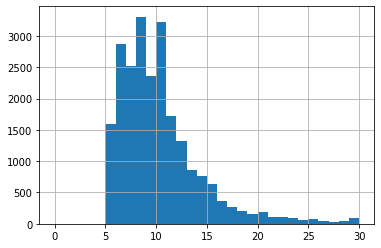

In [32]:
data.loc[data['kitchen_area'] > 50, 'outlier'] = True
data= data[data['kitchen_area'] >= 5]
data['kitchen_area'].hist(range=(0, 30),bins=30);

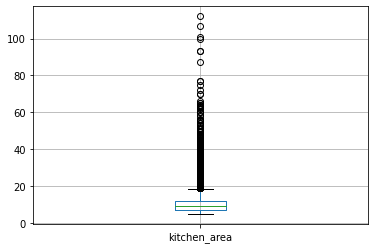

count   23338.00
mean       10.50
std         5.69
min         5.00
25%         7.10
50%         9.20
75%        11.80
max       112.00
Name: kitchen_area, dtype: float64

In [33]:
data.boxplot('kitchen_area')
plt.show()
data['kitchen_area'].describe()

In [34]:
data.loc[data['kitchen_area'] > 18.9, 'outlier_2'] = True

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### Исследуем цену объекта.
Гистограмма после значения 50 млн сливается с нулем. Ограничим рассмотрение условием цены объекта не более 50 млн рублей. Идеальная гистограмма без явных яномалий.

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


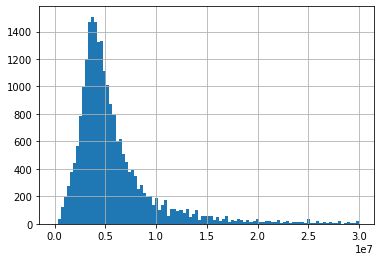

In [35]:
data.loc[data['last_price'] > 50000000, 'outlier'] = True
data['last_price'].hist(range=(0, 30000000),bins=100);

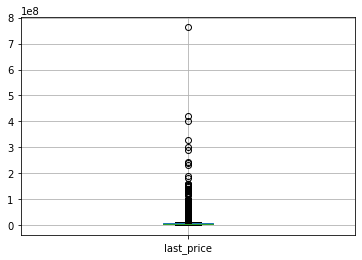

count       23689.00
mean      6541503.41
std      10889087.88
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [36]:
data_clear.boxplot('last_price')
plt.show()
data_clear['last_price'].describe()

In [37]:
data.loc[data['last_price'] > 11597250, 'outlier_2'] = True

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


####  Исследуем количество комнат.
Гистограмма после значения 10 комнат сливается с нулем. Ограничим рассмотрение условием количества комнат не более 10 (data.query('rooms' < 10')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


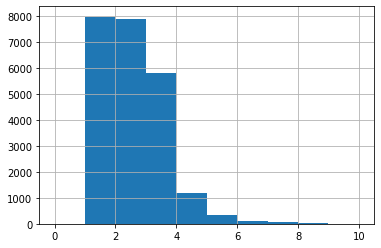

In [38]:
data.loc[data['rooms'] > 10, 'outlier'] = True
data['rooms'].hist(range=(0, 10),bins=10);

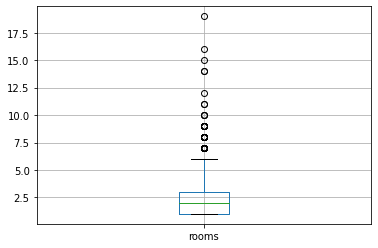

count   23338.00
mean        2.09
std         1.07
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [39]:
data.boxplot('rooms')
plt.show()
data['rooms'].describe()

In [40]:
data.loc[data['rooms'] > 6, 'outlier_2'] = True

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


####  Исследуем высоту потолков
Первоначально было принято, что мы рассматриваем потолки в диапазоне от 2,4 до 6м.
Анализ показал вполне ожидаемые цифры - средняя 2,71 и медианная 2,65 высоты близки.

В границы нормального распределения попадают квартиры с потолками до 3,05м - все, что выше - редкость и эксклюзив.

Высота потолков - параметр стандартизованный, поэтому распределение носит дискретный характер с отдельными фитилями - хрущевки (ок 2.5-2.6м), 9-16 этажки с высоток около 2.7м, современные дома с высотой 3м

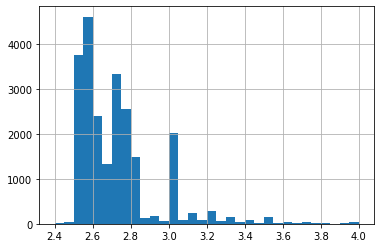

In [41]:
data['ceiling_height'].hist(range=(2.4, 4),bins=32);

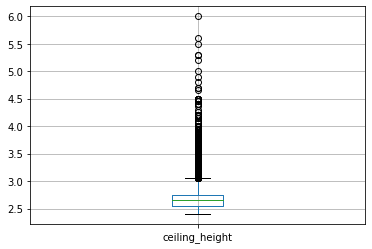

count   23338.00
mean        2.71
std         0.23
min         2.40
25%         2.55
50%         2.65
75%         2.75
max         6.00
Name: ceiling_height, dtype: float64

In [42]:
data.boxplot('ceiling_height')
plt.show()
data['ceiling_height'].describe()

In [43]:
data.loc[data['ceiling_height'] > 3.05, 'outlier_2'] = True

####  Исследуем этаж квартиры
По гистограмме данных выше 30 этажей практически нет, отбросим эти данные.

Гистограмма выдает логичные данные: Если смотреть по убыванию, то заметен плавный рост со скачками на стандартных многоэтажках:
16, 12, 9 и 5-этажки. 
Если я верно оцениваю цифры, то 5-этажек больше чем в два раза больше, чем 9-этажек в объявлениях.

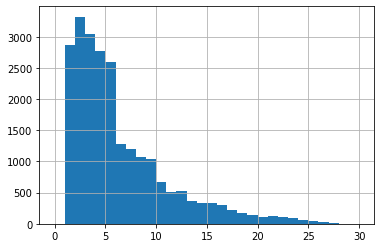

In [44]:
data.loc[data['floor'] > 30, 'outlier'] = True
data['floor'].hist(range=(0, 30),bins=30);

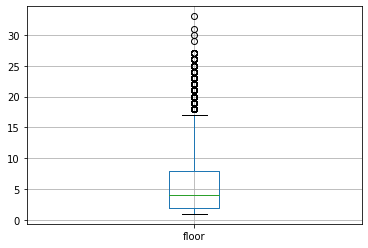

count   23338.00
mean        5.87
std         4.86
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

In [45]:
data.boxplot('floor')
plt.show()
data['floor'].describe()

In [46]:
data.loc[data['floor'] > 17, 'outlier_2'] = True

####  Исследуем тип квартиры по этажу
Первые и последние этажи составляют примерно четверть всего рынка квартир.
В старых домах первый и последний этажи не очень популярны ввиду конструктивных особенностей домов.
В новых домах первого жилого этажа нет, а последний закрыт техническим этажом, поэтому никто не будет беспокоить шумом сверху. 

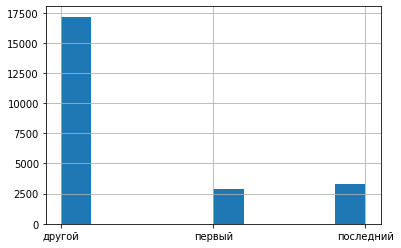

In [47]:
data['flat_type'].hist();

####  Исследуем общее количество этажей в доме
По гистограмме данных выше 30 этажей практически нет, отбросим эти данные. 

Гистограмма дает ключи к гистограмме распределения этажей - в ней видны стандартные проекты многоквартирных домов.

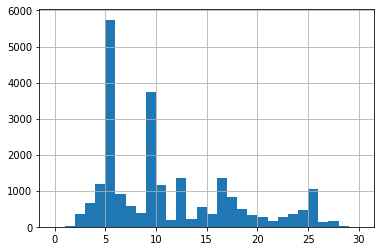

In [48]:
data.loc[data['floors_total'] > 30, 'outlier'] = True
data['floors_total'].hist(range=(0,30), bins=30);

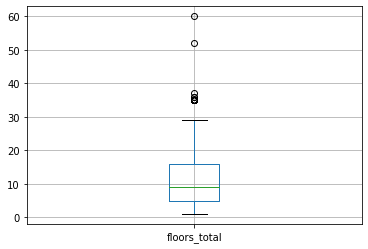

count   23300.00
mean       10.63
std         6.56
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

In [49]:
data.boxplot('floors_total')
plt.show()
data['floors_total'].describe()

<AxesSubplot:xlabel='floors_total'>

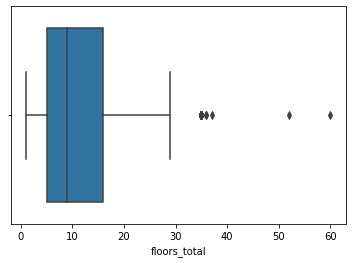

In [86]:
import seaborn as sns
sns.boxplot(x=data["floors_total"])

**Странное значение** усов. На графике верхний ус явно меньше 29, по расчетам (16-5)*1.5 + 16 = 32.5

In [50]:
data.loc[data['floors_total'] > 32, 'outlier_2'] = True

####  Исследуем расстояние до центра города
После 55000м количество данных минимально, ограничим рассмотрение этим значением ('cityCenters_nearest' < 55000').
Тут аномально выглядит пик в районе 4-5км. Тут помогла бы карта с распределением по координатам.
Основное тело гистограммы - спальные районы города. Последующие всплески - большие города в области.

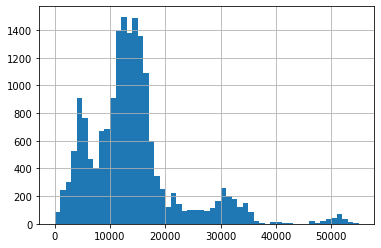

In [51]:
data.loc[data['cityCenters_nearest'] > 55000, 'outlier'] = True
data['cityCenters_nearest'].hist(range=(0, 55000),bins = 55);

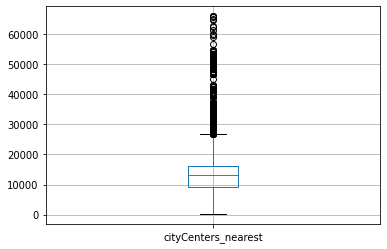

count   17941.00
mean    14174.01
std      8600.21
min       181.00
25%      9220.00
50%     13078.00
75%     16285.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

In [52]:
data.boxplot('cityCenters_nearest')
plt.show()
data['cityCenters_nearest'].describe()

In [53]:
data.loc[data['cityCenters_nearest'] > 26878, 'outlier_2'] = True

####  Исследуем расстояние до аэропорта
После 75000м количество данных минимально, ограничим рассмотрение этим значением ('airports_nearest' < 75000').
На гситограмме видно много отдельных фитилей - вероятно, каждый фитиль - более-менее крупный населенный пункт в области.

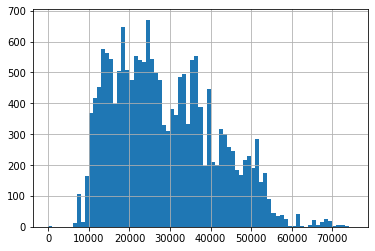

In [54]:
data.loc[data['airports_nearest'] > 75000, 'outlier'] = True
data['airports_nearest'].hist(range=(0,75000),bins = 75);

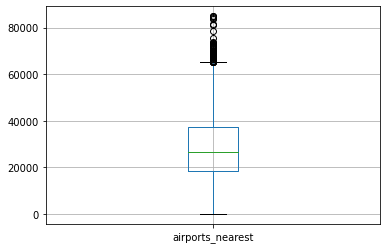

count   17918.00
mean    28816.96
std     12601.77
min         0.00
25%     18621.00
50%     26765.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

In [55]:
data.boxplot('airports_nearest')
plt.show()
data['airports_nearest'].describe()

In [56]:
data.loc[data['airports_nearest'] > 65318, 'outlier_2'] = True

####  Исследуем расстояние до расстояние до ближайшего парка
Отбросим данные со значением больше 2500м ('parks_nearest' < 2500').

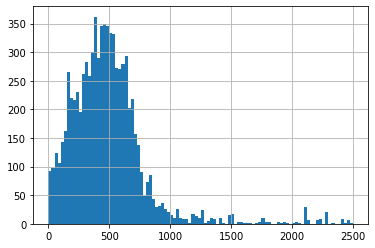

In [57]:
data.loc[data['parks_nearest'] > 2500, 'outlier'] = True
data['parks_nearest'].hist(range=(0, 2500),bins = 100);

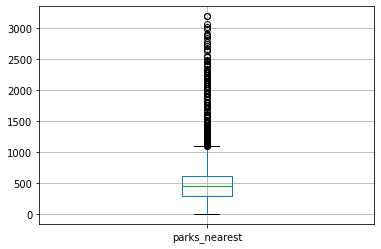

count   8001.00
mean     490.31
std      341.76
min        1.00
25%      288.00
50%      454.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

In [58]:
data.boxplot('parks_nearest')
plt.show()
data['parks_nearest'].describe()

In [59]:
data.loc[data['parks_nearest'] > 1098, 'outlier_2'] = True

####  Исследуем день и месяц публикации
Объявления публикуют в рабочие дни в два раза чаще, чем в выходные.

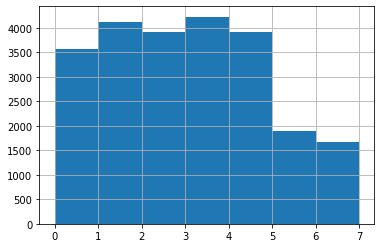

In [60]:
data['publish_day'].hist(range=(0, 7),bins=7);

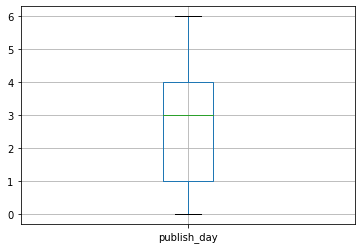

count   23338.00
mean        2.57
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: publish_day, dtype: float64

In [61]:
data.boxplot('publish_day')
plt.show()
data['publish_day'].describe()

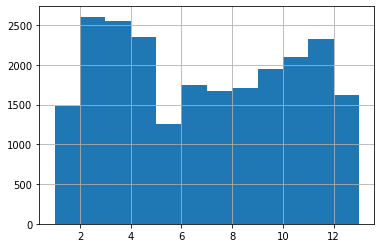

In [62]:
data['publish_month'].hist(range=(1, 13),bins=12);

Прослеживается явная зависимость в публикации объявлений от месяца - "новогодние" декабрь и январь относительно спокойне, следующие три месяца максимально активные. Майские праздники резко снижают активность в размещении объявлений. "Лето" чуть активнее "Нового года", осенью рынок активизируется с желанием закрыть вопросы до праздников.

### Как быстро продавались квартиры

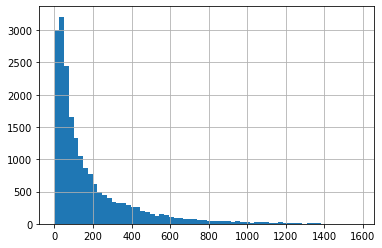

In [63]:
data['days_exposition'].hist(bins = 64);

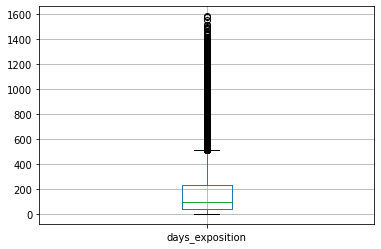

count   20192.00
mean      181.62
std       220.07
min         1.00
25%        45.00
50%        96.00
75%       232.25
max      1580.00
Name: days_exposition, dtype: float64

In [64]:
data.boxplot('days_exposition')
plt.show()
data['days_exposition'].describe()

In [65]:
data.loc[data['days_exposition'] > 512, 'outlier_2'] = True

Медианное значение - 95 дней - вполне адекватная цифра на мой взгляд.
Среднее значение - 180 дней - в среднем значении чувствуются аномалии со сроком публикации за пределами "усов". Для меня лично полгода был бы досаточный срок, чтобы изменить цену и тем самым обновить объявление и обнулить срок размещения.
Быстрой продажей я бы назвал то, что попадает в первый квартиль - до 45 дней. Объективно, квартира требует время на просмотр, раздумия,подготовку документов, получение ипотеки, поэтому такая цифра видится для меня вполне нормальной.
Граница 3-го квартиля - 232 дня - можно смело считать долгой продажей


Если рассмотреть график в пределах от нуля до медианы, то  можно увидеть аномалии - 2 больших фитиля и 3 небольших. Фитили близки к значениям 7, 30, 45, 60 и 90 дней. Очень похоже на автоматической снятие объявления через неделю, месяц, 1.5, 2 и 3 месяца соответственно.

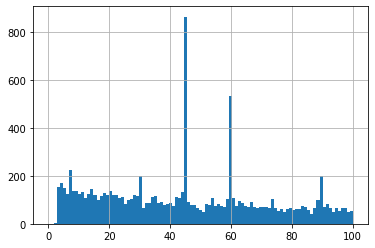

In [66]:
data['days_exposition'].hist(range=(0,100),bins = 101);

### Влияние на полную стоимость объекта
В данной части проекта я буду использовать менее шумный дата-фрейм data_clear

In [67]:
data_clear = data.query('outlier == False')
data_extraclear = data.query('outlier_2 == False')
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23036 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23036 non-null  int64         
 1   last_price            23036 non-null  int64         
 2   total_area            23036 non-null  float64       
 3   first_day_exposition  23036 non-null  datetime64[ns]
 4   rooms                 23036 non-null  int64         
 5   ceiling_height        23036 non-null  float64       
 6   floors_total          22999 non-null  float64       
 7   living_area           23036 non-null  float64       
 8   floor                 23036 non-null  int64         
 9   is_apartment          23036 non-null  bool          
 10  studio                23036 non-null  bool          
 11  open_plan             23036 non-null  bool          
 12  kitchen_area          23036 non-null  float64       
 13  balcony         

В процессе поиска подходящего метода удаления строк мой data-extraclear вариант превратился в ноль, поэтому с текущим вариантом я после каждого исследования проверял количество удаленных строк, потом все удалил.

In [68]:
print(data['outlier'].value_counts())
print(data['outlier_2'].value_counts())

False    23036
True       302
Name: outlier, dtype: int64
False    16215
True      7123
Name: outlier_2, dtype: int64


Осторожное отбрасывание дальних выбросов лишило датасет всего 302 значения - чуть больше процента
Радикальный отброс всех выбросов уменьшил датасет почти на треть - это слишком много.
    Дальше мы увидим, что осторожная очистка датасета увеличила коэффициент корреляциия отдельных величин. Серьезная чистка уменьшила коэффициенты и испортила данные.

#### Общая площадь

Корреляция исходная 0.703
Корреляция средняя 0.769
Корреляция без выбросов 0.66


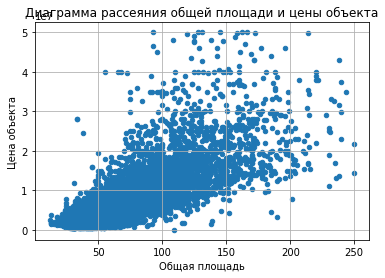

In [69]:
data_clear.plot(x = 'total_area', y = 'last_price', kind='scatter', grid = True, title='Диаграмма рассеяния общей площади и цены объекта')
plt.ylabel('Цена объекта')
plt.xlabel('Общая площадь')
print('Корреляция исходная', round(data['total_area'].corr(data['last_price']),3))
print('Корреляция средняя', round(data_clear['total_area'].corr(data_clear['last_price']),3))
print('Корреляция без выбросов', round(data_extraclear['total_area'].corr(data_extraclear['last_price']),3))

Естественно, что общая площадь влияет на стоимость объекта. Коэффициент коорреляции 0,77 говорит о значимом соотношении этих двух величин.

#### Жилая площадь

Корреляция исходная 0.625
Корреляция средняя 0.67
Корреляция без выбросов 0.546


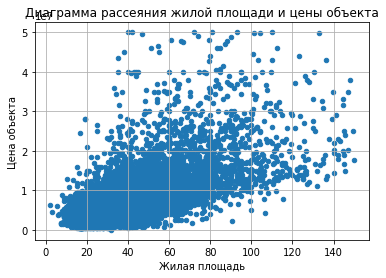

In [70]:
data_clear.plot(x = 'living_area', y = 'last_price', kind='scatter', grid = True, \
                title='Диаграмма рассеяния жилой площади и цены объекта')
plt.ylabel('Цена объекта')
plt.xlabel('Жилая площадь')
print('Корреляция исходная', round(data['living_area'].corr(data['last_price']),3))
print('Корреляция средняя', round(data_clear['living_area'].corr(data_clear['last_price']),3))
print('Корреляция без выбросов', round(data_extraclear['living_area'].corr(data_extraclear['last_price']),3))

Жилая площадь - параметр, не определяющий напрямую стоимость квартиры, но влияющий на принятие решения о покупке квартиры. Но т.к. стоимость квартиры определяется площадью, то жилая площадь естесттвенно оказывает влияние на стоимость квартиры. Коэффициент корреляции 0,67 подтверждает это.

#### Площадь кухни

Корреляция исходная 0.505
Корреляция средняя 0.572
Корреляция без выбросов 0.448


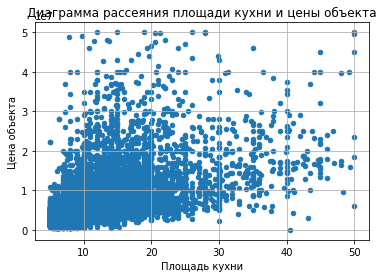

In [71]:
data_clear.plot(x = 'kitchen_area', y = 'last_price', kind='scatter', grid = True, \
                title='Диаграмма рассеяния площади кухни и цены объекта')
plt.ylabel('Цена объекта')
plt.xlabel('Площадь кухни')
print('Корреляция исходная', round(data['kitchen_area'].corr(data['last_price']),3))
print('Корреляция средняя', round(data_clear['kitchen_area'].corr(data_clear['last_price']),3))
print('Корреляция без выбросов', round(data_extraclear['kitchen_area'].corr(data_extraclear['last_price']),3))

Стоимость квадратного метра кухни такая же как и жилой. В площади кухни зачастую используется параметр достаточности - "зачем большая кухня, если маленькая семья", поэтому "чем больше, тем лучше" тут работает не всегда. Но площадь определяет цену, поэтому параметр влияет на цену. Коэффициент корреляции 0.57

#### Количество комнат

In [72]:
room_price=data_clear.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
print (room_price)
print('Корреляция исходная', round(data['rooms'].corr(data['last_price']),3))
print('Корреляция средняя', round(data_clear['rooms'].corr(data_clear['last_price']),3))
print('Корреляция без выбросов', round(data_extraclear['rooms'].corr(data_extraclear['last_price']),3))

       last_price
rooms            
1         3600000
2         4770000
3         6177600
4         8860000
5        12565000
6        14500000
7        16800000
8        19900000
9        17000000
Корреляция исходная 0.393
Корреляция средняя 0.477
Корреляция без выбросов 0.407


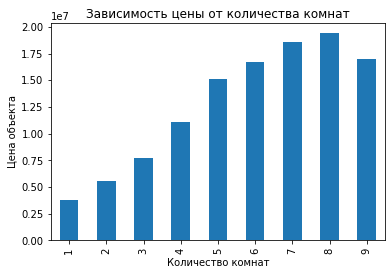

In [73]:
data_clear.groupby('rooms')['last_price'].mean().plot.bar(title='Зависимость цены от количества комнат');
plt.ylabel('Цена объекта')
plt.xlabel('Количество комнат');

Логично предположить, что чем больше комнат, тем дороже квартира. Картина должна быть похожа на жилую площадь, 
но больше комнат может быть в той же площади, что и меньше комнат, а значит, цена будет похожей. Влияние, конечно же есть, 
но не прямое. Коэффициэнт корреляции 0,48.
Помещения с более чем 6 комнатами уже являются выбросами, поэтому характерные зависимости с большим числом комнат могут не соблюдаться, что и видно на 9-комнатных помещениях, которые дешевле даже 7-комнатных.

#### Этаж объекта

In [74]:
floor_price=data_clear.pivot_table(columns = 'flat_type', values = 'last_price', aggfunc = 'mean')
floor_price
# print(data_clear['flat_type'].corr(data_clear['last_price']))

flat_type,другой,первый,последний
last_price,6189560.75,4625053.10,5664446.79


Text(0.5, 0, 'Тип этажа')

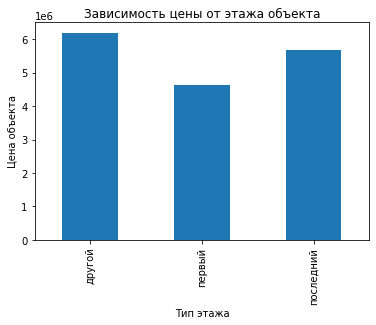

In [75]:
data_clear.groupby('flat_type')['last_price'].mean().plot.bar(title='Зависимость цены от этажа объекта');
plt.ylabel('Цена объекта')
plt.xlabel('Тип этажа')

Как я писал выше, первый и последний этажи влияют на старый жилой фонд, поэтому среднее/медианное значение первого этажа ниже всех остальных. В новостройках ситуация по этажу фактически линейная - чем выше, тем дороже.

#### Дата размещения (день недели, месяц, год)
Несмотря на различие в количестве объявлений по днгям недели, итоговая цена на квартиры не зависит от этого параметра. Логично. Тут больший интерес для анализа вызвал бы день закрытия сделки, но его нет.

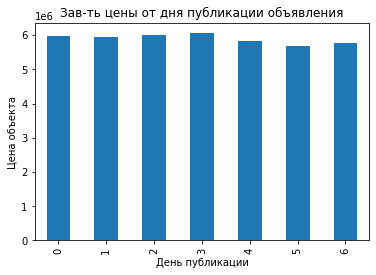

In [76]:
data_clear.groupby('publish_day')['last_price'].mean().plot.bar(title='Зав-ть цены от дня публикации объявления');
plt.ylabel('Цена объекта')
plt.xlabel('День публикации');

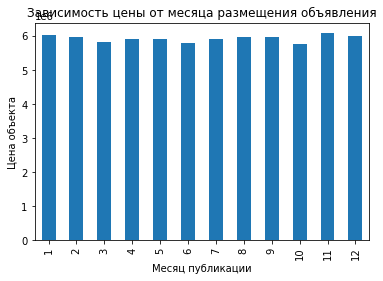

In [77]:
data_clear.groupby('publish_month')['last_price'].mean().plot.bar(title = \
                  'Зависимость цены от месяца размещения объявления');
plt.ylabel('Цена объекта')
plt.xlabel('Месяц публикации');

Картина по месяцам года так же более менее ровная, явных вершин и впадин нет.


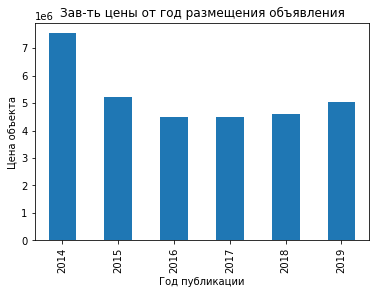

In [78]:
data_clear.groupby('publish_year')['last_price'].median().plot.bar(title = \
    'Зав-ть цены от год размещения объявления');
plt.ylabel('Цена объекта')
plt.xlabel('Год публикации');

По этой диаграмме напрашивается вывод о "последствиях олимпиады 2014 года". Они, конечно, есть, и я сам лично их ощутил, 
но если взглянуть на количество объявлений: 


2014-11-27 00:00:00 2019-05-03 00:00:00


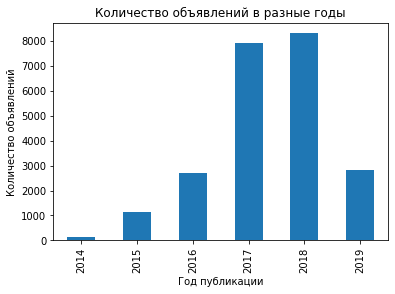

In [79]:
data_clear.groupby('publish_year')['last_price'].count().plot.bar(title='Количество объявлений в разные годы');
plt.ylabel('Количество объявлений')
plt.xlabel('Год публикации')
last_date=max(data['first_day_exposition'])
first_date=min(data['first_day_exposition'])
print(first_date, last_date)

Мы видим, что в 2014 году в статистике учтено крайне мало объявлений, поэтому что средняя, что медиана чувствительны к любым значениям.  Отсюда и всплеск в 2014. При увеличении количества данных, значения среднего/медианы приближаются к данным других годов, где уже можно увидеть, что в 2017 году были самые низкие цены на недвижимость, после чего они стали расти. Этот период мне тоже знаком с характерным словом "успел купить".
Данные в 2019 году охватывают только первые 4 месяца, поэтому график показывает такое падение. По году количество должно быть на уровне прошлых годов.


### О средней цене за квадратный метр
Найдем 10 населенных пунктов с максимальным количеством объявлений и вычислим среднюю стоимость квадратного метра:

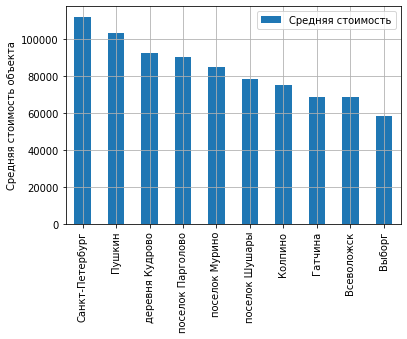

In [80]:
price_sq_town = data_clear.pivot_table(index='locality_name', values='sq_price', aggfunc=['count','mean'])
price_sq_town.columns= ['Кол-во', 'Средняя стоимость']
price_sq_town = price_sq_town.sort_values(by = 'Кол-во', ascending=False).head(10)
price_sq_town = price_sq_town.sort_values(by = 'Средняя стоимость', ascending=False)
price_sq_town.plot(kind = 'bar', y = 'Средняя стоимость', grid = True, style = 'o');
plt.ylabel('Средняя стоимость объекта')
plt.xlabel('');

Таким образом городом с максимальной средней стоимостью квадратного метра является ожидаемо Санкт-Петербург,
Минимальная стоимость квадратного метра в 10 самых популярных городах - в Выборге.

### О стоимости квадратного метра на каждом километре в Санкт-Петербурге.
Исследование проведу для исходного датафрейма и для очищенного.

cityCenters_km
0.00    245833.52
1.00    177327.45
2.00    158092.63
3.00    121490.56
4.00    130382.02
5.00    140391.78
6.00    151055.05
7.00    156275.13
8.00    124858.96
9.00    113132.89
10.00   112628.47
11.00   108538.27
12.00   107333.95
13.00   107877.86
14.00   103982.54
15.00   104193.22
16.00   100475.66
17.00    96371.15
18.00    96271.37
19.00    98703.61
20.00   100699.25
21.00    94581.36
22.00    91330.41
23.00    91915.28
24.00    84962.44
25.00    91531.35
26.00    87798.86
27.00   132115.50
28.00    81161.86
29.00    72953.50
Name: sq_price, dtype: float64


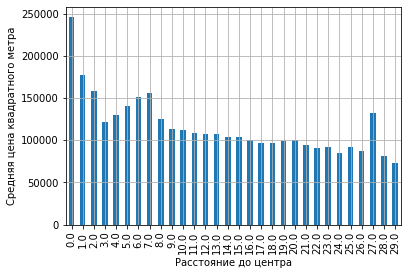

In [81]:
spb = data[data['locality_name'] == 'Санкт-Петербург']
price_spb_km= spb.groupby('cityCenters_km')['sq_price'].mean()
print(price_spb_km)
price_spb_km.plot(kind = 'bar',grid = True, style = 'o')
plt.ylabel('Средняя цена квадратного метра')
plt.xlabel('Расстояние до центра');

cityCenters_km
0.00    204865.50
1.00    146803.37
2.00    137926.80
3.00    118743.24
4.00    127233.65
5.00    135031.21
6.00    141353.16
7.00    141974.79
8.00    123755.19
9.00    112904.50
10.00   112842.27
11.00   108184.37
12.00   107352.99
13.00   107853.46
14.00   103982.44
15.00   104197.80
16.00   100475.66
17.00    96374.90
18.00    96217.13
19.00    98703.61
20.00    87214.84
21.00    94581.36
22.00    91330.41
23.00    92158.38
24.00    84962.44
25.00    91531.35
26.00    87798.86
27.00   132115.50
28.00    81161.86
29.00    72953.50
Name: sq_price, dtype: float64


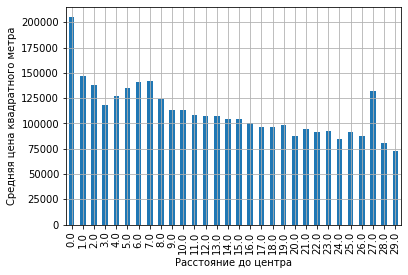

In [82]:
spb = data_clear[data_clear['locality_name'] == 'Санкт-Петербург']
price_spb_km= spb.groupby('cityCenters_km')['sq_price'].mean()
print(price_spb_km)
price_spb_km.plot(kind = 'bar',grid = True, style = 'o')
plt.ylabel('Средняя цена квадратного метра')
plt.xlabel('Расстояние до центра');

Гистограмма полныхх и очищенных данных говорит следующее
- центр конечно же самый дорогой
- жилье в пешей доступности от центра (до 2.5 км) ценно именно этим параметром, при том, что оно все старое.
- следующий километр (2.5 - 3.5) довольно сильно проваливается относительно предыдущего. Растет расстояние, растет и количество квартир, но, вероятно, очень старых.
- следующий диапазон от 3.5 до 7.5 характеризуется ростом стоимости жилья. Я связываю это с современными дорогими объектами в западной части города - габережные Невы и Финского залива. Пик соответствует району, близкому к стадиону и Лахта-центру, так же район характеризуется близостью к крпным паркам. Итак, Арена, Лахта, современное жилье, парки и вода - очень привлекательная локация.
- Диапазон 7.5 - 8.5 еще имеет влияние предыдущего пункта,
- Далее цена падает по линии, которую можно было бы начать от отметки 3км. На гистограмме полных данных у нас четкая линия, на очищенных есть локлаьные провалы и пики. Осторожно отброшенные данные повлияли на общие данные. Причем пик на 20-м километре общих данных превратился во впадину на очищенных данных. Вероятно, был отброшен эксклюзивный объект(ы), средняя цена квадратного метра там упала со 100 до 88 тыс рублей.
- В конце гистограммы есть аномалия в районее 27км. Судя по карте этому расстоянию соответствуют Петергоф и Царское село - вполне вероятно, что многие объекты были приписаны к большому городу вместо локальных наименований.

## Общий вывод

База включает в себя объявления с 11.2014 по 05.2019

Более 15000 из 23.5 тысяч объявлений относятся к объектам в Санкт-Петербурге, остальные - к области. При этом количество объявлений меньше в десятки раз. В ТОП-10 городов количество объявлений варьируется от 522 до 236 в Мурино и Выборге соотетственно.
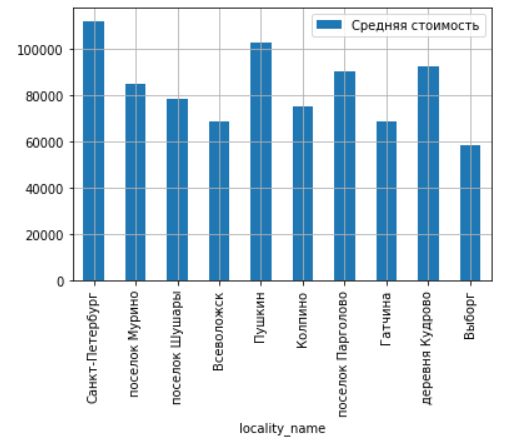

Анализ цен в Санкт-Петербурге выявил, что в городе помимо географического центра города с высокой стоимостью недвижимости, есть еще и центр современного города, расположенный в районе Арены и Лахта-центра, сопровождаемый несоклькими парками и набережными Невы и Финского залива.
Многие продавцы приписывали район Петергофа и Царского села к Санкт-Петербургу - это заметно по всплеску цены на отметке 27кс от центра.
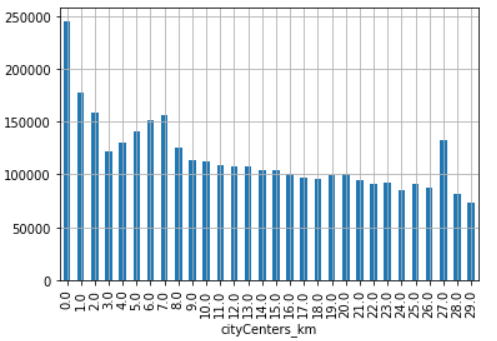

Половина всех объявлений была закрыта в течение 3 месяцев, при этом среднее время закрытия - полгода.
Четверть всех объявлений закрывалась в промежутке до 45 дней, что можно считать быстрой продажей.
Заметная часть объявлений снималась с публикации через заданный промежуток времени - от недели до 3-х месяцев. 45 дней - самая популярная настройка автоматического закрытия объявления. Вероятно, она внесла сущенственный вклад в параметры распределения.
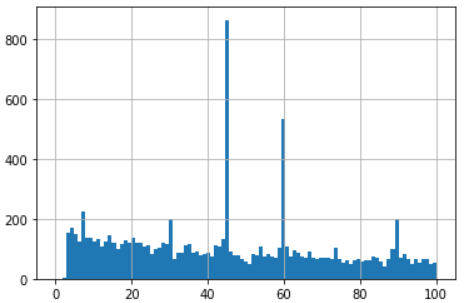
Первый, второй и третий квартили я могу обозначить как пределы быстрой, нормальной и долгой продажей. Среднее значение в 180 дней  (при медиане в 95 дней) - явное следствие древних объявлений, про которые вероятно просто забыли.

При изучении дата-сета были обнаружены аномалии с высотой потолков. Все аномальные значения за пределами диапазона 2.4-6м (веротяно, двухярусная квартира) и пропуски ыли заменены, где это возможно на медианные высоты аналогичных по этажности дома квартир, строки не удалялись.
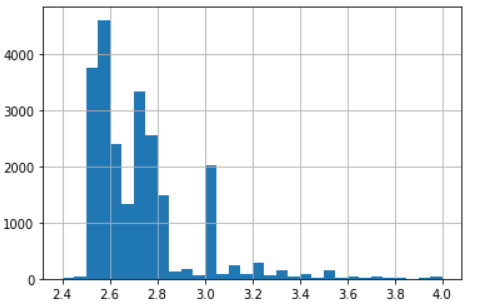
Пропуски в параметре "Площадь кухонь" заполнялись медианными значениями в кухнях домов соответствующей этажности с учетом количества комнат в квартире.
Пропуски в жилой прощади заполнялись медианным значением коэффициента отношения полной к жилой площади, умноженного на полную площадь.
Пропуски в геоданных нет возможности заменить на какие-либо близкие к правде значения. Они остаются без изменений.

Были изучены 14 параметров объявлений.
По результатам построения гистограмм проводилось отбрасывание явных выбросов, частота появления которых стремилаь к нулю. Вторым вариантом отбрасывались значения, соответствующие выбросам по гистограмме (за пределами усов).

В графиках общей и ижлой площади наблюдаются всплески, зависящие от количества комнат в квартире. На гистограмме жилой площади они хорошо заметны, на общей площади заметно влияние жилой площади.
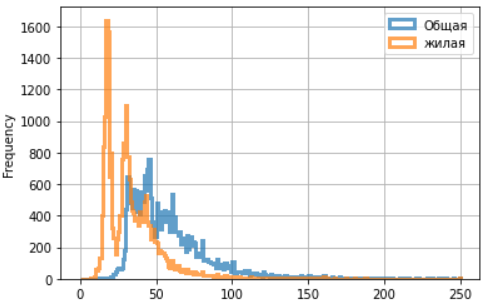
На гистограмме площади кухни так же есть отдельные фитили, характерные для домов стандартных проектов
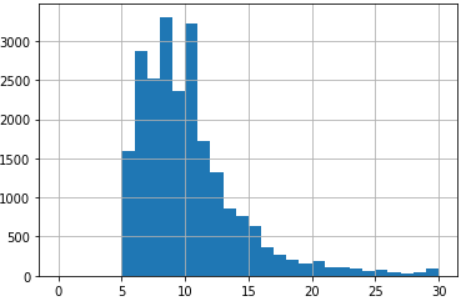
Гистограмма стоимости выглядит очень хорошо, без явных аномалий.
Пик приходится на стоимость в районе 4млн рублей, что примерно соответствует 1-2=х комнатным квартирам
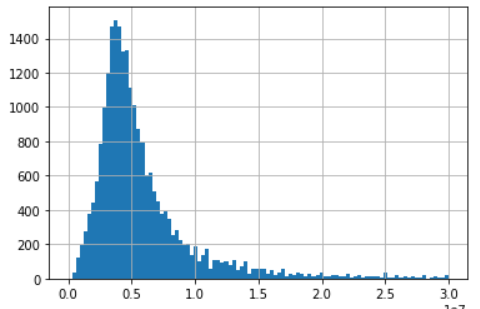 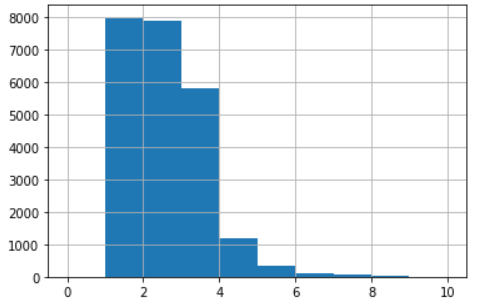.
Большая часть объявлений - это старые советсике дома стандартных проектов, поэтому на гистограмме высоты потолков четко видны хрущевки (2.5-2.6м), 9-12 этажки с потолком 2.7м, новостройки с потолками 3м
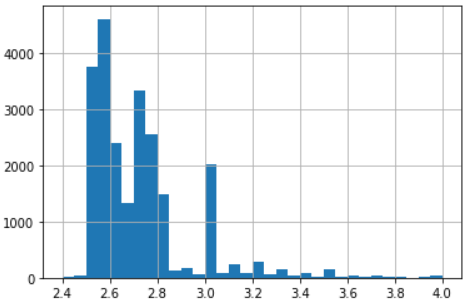
Этажнасто домов представлена на следующей гистограмме
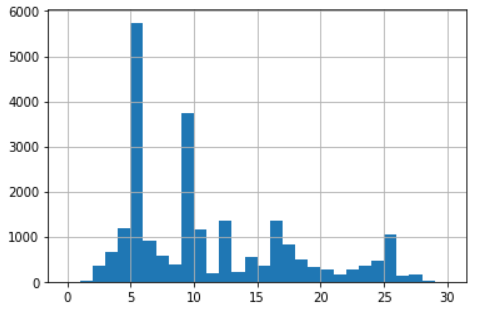
Первые и последние этажи составляют примерно четверть всего рынка квартир.
В старых домах первый и последний этажи не очень популярны ввиду конструктивных особенностей домов.
В новых домах первого жилого этажа нет, а последний закрыт техническим этажом, поэтому никто не будет беспокоить шумом сверху. 
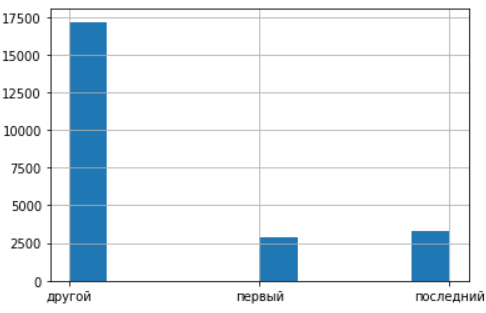
Исследуя расстояние до центра города, можно заметить, что аномально выглядит пик в районе 4-5км. Тут помогла бы карта с распределением по координатам. Основное тело гистограммы - спальные районы города. Последующие всплески - большие города в области.
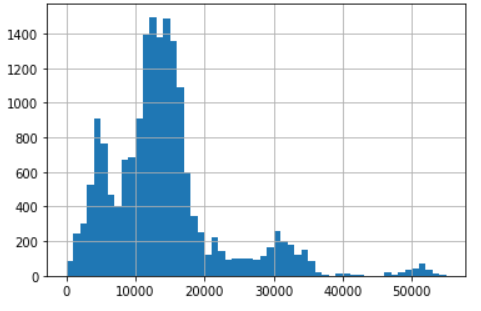
Расстояние до аэропорта. На гситограмме видно много отдельных фитилей - вероятно, каждый фитиль - более-менее крупный населенный пункт в области. Тело графика - Санкт-Петербург.
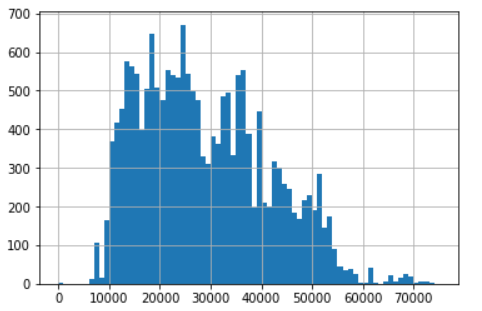
Расстояние до парков. Данные более 1км встречаются редко
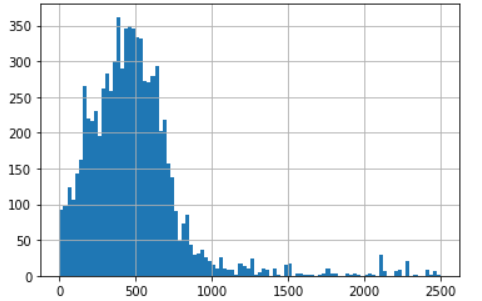
Дата публикации.
Объявления публикуют в рабочие дни в два раза чаще, чем в выходные
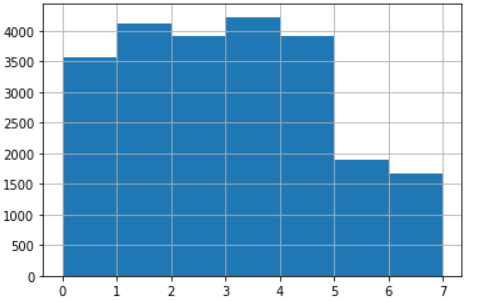
При этом прослеживается явная зависимость в публикации объявлений от месяца - "новогодние" декабрь и январь относительно спокойне, следующие три месяца максимально активные. Майские праздники резко снижают активность в размещении объявлений. "Лето" чуть активнее "Нового года", осенью рынок активизируется с желанием закрыть вопросы до праздников.
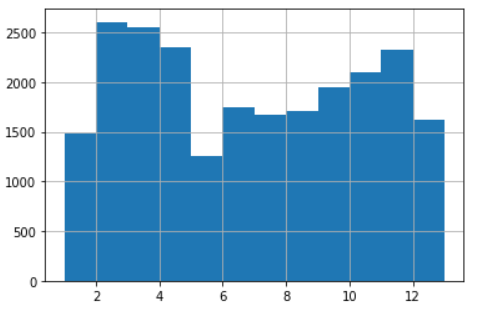

По результатам проверки данных параметров были сформированы длва датасета с очисткой от сильных выбросов (302 строки) и с полной очисткой выбрасов (6790 строк). Второй вариант уже по объему потери данных выглядит неубедительно.

Коэффициенты корреляции между Полной, жилой, кухонной площадью и полной стоимостью составили 0.77, 0.67 и 0.57 соответственно. 

Число комнат. Логично предположить, что чем больше комнат, тем дороже квартира. Картина должна быть похожа на жилую площадь, но больше комнат может быть в той же площади, что и меньше комнат, а значит, цена будет похожей. Влияние, конечно же есть, но не прямое. Коэффициэнт корреляции 0,48. Помещения с более чем 6 комнатами уже являются выбросами, поэтому характерные зависимости с большим числом комнат могут не соблюдаться, что и видно на 9-комнатных помещениях, которые дешевле даже 7-комнатных.
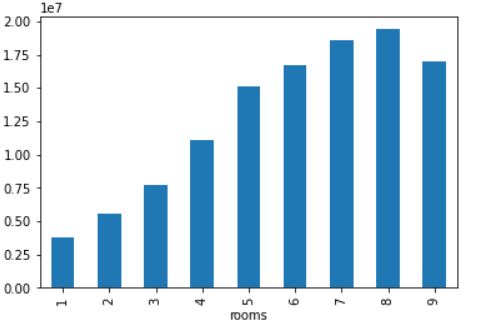

Тип квартиры по этажу. В старом жилом фонде первый и последний этажи отстают от остальных. В современных домах такой анализ не имеет смысла - нет второго этажа, а чем выше, тем дороже с максимумом на последнем этаже.
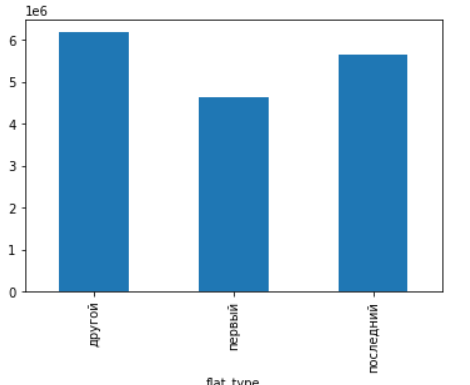

Ну и наконец, влияние даты на цену. Дни недели и месяцы не оказывают влияния на  стоимость квартир. Фактора сезонности в продаже нет. Изменения заметны только в разрезе лет, но и тут вмешивается малое количество данных в первый (а возможно и второй) год сбора статистики.
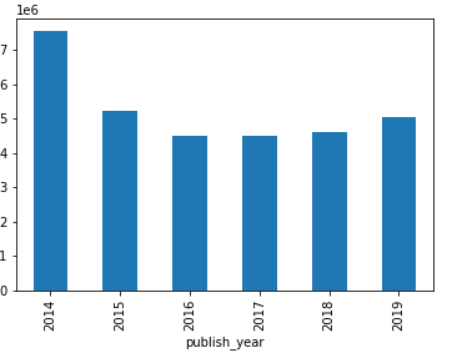
количество объявлений.

Данные дата-сета, к которым не ставились вопросы, не анализировались.










